# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [62]:
# get all the red ball data
X_rec1 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_14h55m.csv', decimal='.', delimiter=',')
X_rec2 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_14h56m.csv', decimal='.', delimiter=',')
X_rec3 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_14h58m.csv', decimal='.', delimiter=',')
X_rec4 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_14h59m.csv', decimal='.', delimiter=',')
X_rec5 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h00m.csv', decimal='.', delimiter=',')
X_rec6 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h01m.csv', decimal='.', delimiter=',')
X_rec7 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h02m.csv', decimal='.', delimiter=',')
X_rec8 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h04m.csv', decimal='.', delimiter=',')
X_rec9 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h06m.csv', decimal='.', delimiter=',')
X_rec10 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h08m.csv', decimal='.', delimiter=',')
X_rec11 = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h09m.csv', decimal='.', delimiter=',')

In [63]:
# get all the positions data
y_rec1 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_14h55m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec2 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_14h56m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec3 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_14h58m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec4 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_14h59m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec5 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h00m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec6 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h01m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec7 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h02m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec8 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h04m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec9 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h06m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec10 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h08m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec11 = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h09m.csv', decimal='.', delimiter=',').iloc[4:]

In [64]:
(X_rec1.shape, y_rec1.shape), (X_rec2.shape, y_rec2.shape), (X_rec3.shape, y_rec3.shape), (X_rec4.shape, y_rec4.shape)

(((980, 16), (980, 3)),
 ((1016, 16), (1016, 3)),
 ((964, 16), (964, 3)),
 ((1008, 16), (1008, 3)))

In [65]:
print(f"The amount of NaN in rec1: {X_rec1.isna().sum().sum()}")
print(f"The amount of NaN in rec2: {X_rec2.isna().sum().sum()}")
print(f"The amount of NaN in rec3: {X_rec3.isna().sum().sum()}")
print(f"The amount of NaN in rec4: {X_rec4.isna().sum().sum()}")
print(f"The amount of NaN in rec5: {X_rec5.isna().sum().sum()}")
print(f"The amount of NaN in rec6: {X_rec6.isna().sum().sum()}")
print(f"The amount of NaN in rec7: {X_rec7.isna().sum().sum()}")
print(f"The amount of NaN in rec8: {X_rec8.isna().sum().sum()}")
print(f"The amount of NaN in rec9: {X_rec9.isna().sum().sum()}")
print(f"The amount of NaN in rec10: {X_rec10.isna().sum().sum()}")
print(f"The amount of NaN in rec11: {X_rec11.isna().sum().sum()}")

The amount of NaN in rec1: 4
The amount of NaN in rec2: 20
The amount of NaN in rec3: 30
The amount of NaN in rec4: 38
The amount of NaN in rec5: 4
The amount of NaN in rec6: 0
The amount of NaN in rec7: 5340
The amount of NaN in rec8: 7174
The amount of NaN in rec9: 2
The amount of NaN in rec10: 0
The amount of NaN in rec11: 0


Rec7 and Rec8 have too many NaNs

In [66]:
X_rec7.isna().sum()

u0    177
v0    177
u1      5
v1      5
u2    497
v2    497
u3    501
v3    501
u4    496
v4    496
u5    495
v5    495
u6    499
v6    499
u7      0
v7      0
dtype: int64

In [67]:
X_rec8.isna().sum()

u0    294
v0    294
u1     16
v1     16
u2    653
v2    653
u3    658
v3    658
u4    654
v4    654
u5    654
v5    654
u6    658
v6    658
u7      0
v7      0
dtype: int64

### 2.3 Combine all the datasets

In [68]:
X_train = pd.concat([X_rec1, X_rec2,X_rec3, X_rec4, X_rec5, X_rec6, X_rec7, X_rec8, X_rec9, X_rec10, X_rec11])
y_train = pd.concat([y_rec1, y_rec2,y_rec3,y_rec4,y_rec5,y_rec6, y_rec7, y_rec8,y_rec9,y_rec10, y_rec11])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [69]:
X_train.isna().sum()

u0     481
v0     481
u1      23
v1      23
u2    1152
v2    1152
u3    1172
v3    1172
u4    1162
v4    1162
u5    1151
v5    1151
u6    1165
v6    1165
u7       0
v7       0
dtype: int64

In [70]:
X_train.shape, y_train.shape

((11181, 16), (11181, 3))

In [71]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [72]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,u7,v7,x,y,z
0,70.0,44.0,24.5,44.0,25.0,66.0,48.5,66.0,70.5,66.0,25.0,89.0,69.0,89.0,47.5,43.5,9.135557,3.443234,23.83352
1,70.5,44.0,24.0,45.0,25.0,67.0,48.0,66.5,70.0,66.5,25.0,89.0,69.0,89.5,47.5,44.0,9.122249,3.575877,24.07841
2,70.5,45.0,25.0,45.0,25.0,68.0,49.0,68.0,70.0,68.0,25.0,90.0,69.0,90.0,48.0,45.0,9.100133,3.707339,24.28736
3,70.0,46.0,25.0,46.0,25.0,68.0,49.0,68.5,70.0,68.0,25.5,91.0,69.5,90.5,48.0,45.0,9.069309,3.837035,24.44559
4,70.0,47.0,25.0,47.0,25.5,69.5,48.5,69.0,70.0,69.0,26.0,91.0,70.0,91.0,49.0,47.0,9.029914,3.964389,24.54194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,87.0,37.0,41.0,37.0,42.0,60.0,64.0,60.5,87.0,60.0,43.0,83.0,85.5,82.5,64.0,38.0,6.683854,2.394149,21.98808
11177,86.5,38.0,41.0,38.0,41.0,61.0,63.5,61.0,86.0,61.0,42.0,83.0,85.0,83.0,63.0,39.0,6.766639,2.527970,22.21922
11178,86.0,39.0,40.0,39.0,41.0,62.0,63.0,62.0,85.0,62.0,41.5,84.0,84.5,84.5,63.0,40.0,6.845751,2.666299,22.45815
11179,85.0,40.0,40.0,40.0,40.0,62.5,62.5,62.5,85.0,62.0,41.5,85.0,84.0,85.0,62.0,42.0,6.920774,2.808478,22.70374


In [73]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 12612
The data has missing values: 0


In [74]:
X = combined.iloc[:, :16]
y = combined.iloc[:, 16:]


In [75]:
X.shape, y.shape

((9975, 16), (9975, 3))

In [76]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [77]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [78]:
# Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 28000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
model = MLPRegressor(random_state=42, max_iter=28000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [79]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [80]:
#model = random_search.best_estimator_

## 5. Training the Model

In [81]:
model.fit(X_scaled, y_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=28000,
             random_state=42)

## 6. Make Predictions On Test Data

In [82]:
import pandas as pd

In [83]:
X_test_8_a = pd.read_csv('../data-8-cams/red_ball_coordinates_128px_2024-03-19_15h10m.csv', decimal='.', delimiter=',')

In [84]:
y_test_8_a = pd.read_csv('../data-8-cams/positions_xyz_2024-03-19_15h10m.csv', decimal='.', delimiter=',').iloc[4:]
(X_test_8_a.shape, y_test_8_a.shape)

((993, 16), (993, 3))

In [85]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :16]
    y_val = combined_test.iloc[:, 16:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [86]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 0.34689906363104006
Mean Absolute Error on Test Data Set: 0.4784865370983291
R2 Score on Test Data set: 0.7297154938152511


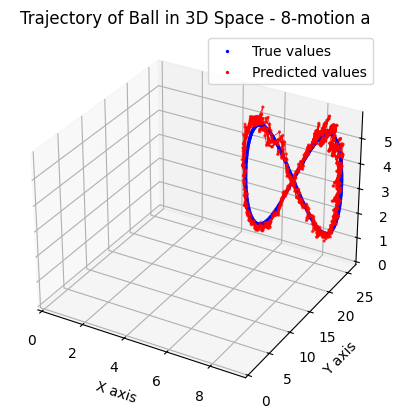

In [87]:
X_test_8_scaled_a, y_test_8_a = prepare_and_scale_test_data(X_test_8_a, y_test_8_a, scaler_x)
X_test_8_pred_a, mse_8_a, mae_8_a, r2_8_a = predict_evaluate_plot(X_test_8_scaled_a, y_test_8_a, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion a')